APRENDIZAJE AUTOMÁTICO

EJEMPLO DE REGRESIÓN LINEAL CON SK LEARN

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler  
import random
import seaborn as sns

# **CARGAR DATASET**

In [8]:
data= pd.read_csv("https://raw.githubusercontent.com/KevinFDI/IML_Practica_2/main/datasets/boston.csv") 
x= data.drop('medv', axis=1)
y= data['medv']
n,d= x.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

El dataset tiene 506 registros, de 13 dimensiones


Visualizar distribución de los features

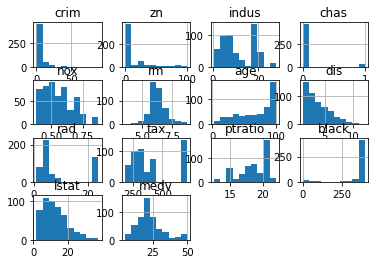

In [9]:
data.hist();

Matriz de correlación entre atributos

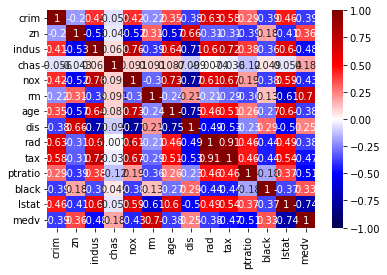

In [11]:
corr= data.corr()
plt.figure()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='seismic');

# **NORMALIZAR LOS DATOS**

In [12]:
NORMALIZAR= 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(x)  
    x= scaler.transform(x)

# **ENTRENAR MODELO DE REGRESIÓN LINEAL**

Crea el objeto modelo

In [13]:
modelo= LinearRegression()

# **ENTRENA**

In [14]:
modelo.fit(x,y)

LinearRegression()

Predice

In [15]:
y_predict= modelo.predict(x)

Coeficientes (parámetros del modelo)

In [ ]:
w= modelo.coef_
b= modelo.intercept_

Scores

In [16]:
mse_error= mean_squared_error(y_predict, y)
print("Error cuad. medio: %.2f" % mse_error)

mae_error= mean_absolute_error(y_predict, y)
print("Error abs. medio: %.2f" % mae_error)

r2_s= r2_score(y, y_predict)
print("r2_score: %.2f" % r2_s)

Error cuad. medio: 21.89
Error abs. medio: 3.27
r2_score: 0.74


# **PLOT COEFICIENTES**

In [17]:
plt.figure()
plt.bar(range(d+1), np.concatenate((w,[b])))
labels= data.columns.values; labels[-1]= 'Bias'
plt.xticks(range(w.shape[0]+1), labels, rotation=35)
plt.grid()

NameError: ignored

<Figure size 432x288 with 0 Axes>

# P**LOT VALORES ESPERADOS VS. VALORES PREDICTIVOS**

(Text(0.5, 0, 'valores reales'), Text(0, 0.5, 'Valores predichos'))

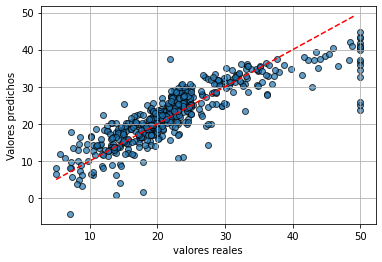

In [18]:
plt.figure()
xx= range(round(y.min()),round(y.max()))
plt.scatter(y, y_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx, xx, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos")

# **EVALUACIÓN DEL MODELO CON NUEVO DATO**

In [19]:
index_i= random.randint(0, x.shape[0]-1)
x_nuevo= np.zeros((1,d))
x_nuevo[0]=x[index_i, :]
y_real= y[index_i]
y_predict= modelo.predict(x_nuevo)
x_nuevo_sin_norm= scaler.inverse_transform(x_nuevo)

print("\nNuevo dato (%d):" % (index_i))
print("El modelo predice: %f " % ( y_predict))
print("El valor real es: %f" % (y_real))


Nuevo dato (207):
El modelo predice: 17.854472 
El valor real es: 22.500000
